### Multiple categories

In the last lesson, we calculated a chi-squared value indicating how the observed frequencies in a single categorical column, such as sex, varied from the US population as a whole.

In this mission, we will make this same technique applicable to cross tables, that show how two categorical columns interact. For instance, here's a table showing the relationship between sex and high_income:

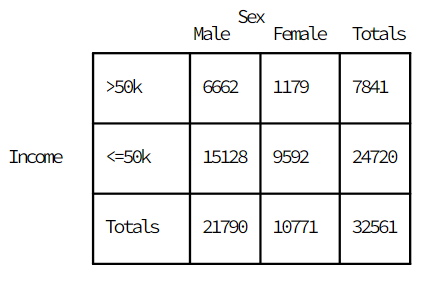

Take a look at this diagram, you might see a pattern between sex and high_income, but it's hard to immediately quantify that pattern, and tell if it's significant. We can apply the chi-squared test (also known as the chi-squared test of association) to figure out if there's a statistically significant correlation between two categorical columns.

### Calculating expected values

In the single category chi-squared test, we find expected values from other data sets, and then compare with our own observed values. In a multiple category chi-squared test, we calculate expected values across our whole dataset. We'll create this by converting our chart from the last screen into proportions:

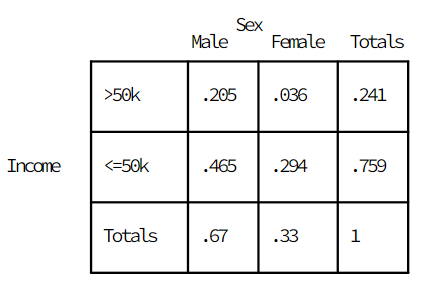

Each cell represents the proportion of people in the data set that fall into the specified categories.

- 20.5% of people in the whole data set are males earning >50k in income.
- 33% of the whole dataset is Female
- 75.9% of the whole dataset earns <=50k.

We can use our total proportions to calculate expected values. `24.1%` of all people in `income` earn `>50k`, and `33%` of all people in `income` are `Female`, so we'd expect the proportion of people who are female and earn `>50k` to be `0.241 * 0.33`, which is `0.07953`. We have this expectation based on the proportions of Females and >50k earners across the whole dataset. Instead, we see that the observed proportion is `0.036`, which **indicates that there may be some correlation between the sex and high_income columns.**

We can convert our expected proportion to an expected value by multiplying by `32561`, the total number of rows in the data set, which gives us `32561 * 0.07953`, or `2589.6`.

Using the expected proportions in the table above, calculate the expected values for each of the 4 cells in the table.

- Calculate the expected value for Males who earn `>50k`, and assign to males_over50k.
- Calculate the expected value for Males who earn `<=50k`, and assign to males_under50k.
- Calculate the expected value for Females who earn `>50k`, and assign to females_over50k.
- Calculate the expected value for Females who earn `<=50k`, and assign to females_under50k.

In [9]:
males_over50k = 0.241 * 0.67 * 32561
males_under50k = 0.759 * 0.67 * 32561
females_over50k = 0.241 * 0.33 * 32561
females_under50k = 0.759 * 0.33 * 32561

### Calculating chi-squared

On the last screen, you should have a table similar to the table below:

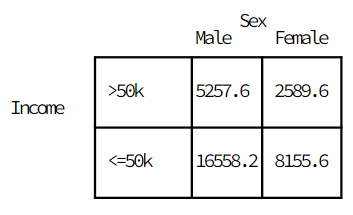

Now that we have our expected values, we can calculate the chi-squared value by using the same principle from the previous mission. Here are the steps:

- Subtract the expected value from the observed value.
- Square the difference.
- Divide the squared difference by the expected value.
- Repeat for all the observed and expected values and add up the values.

Here's the formula:

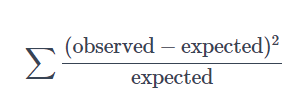


Here's the table of our observed values for reference:

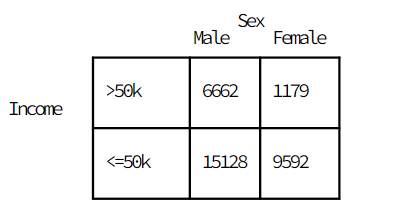

**Compute the chi-squared value for the observed values and the expected values.**

In [10]:
chisq_gender_income = (6662 - males_over50k)**2 / males_over50k + (15128 - males_under50k)**2 / males_under50k  \
                   + (1179 - females_over50k)**2 / females_over50k \
                     + (9592 - females_under50k)**2 / females_under50k

### Finding statistical significance

Now that we've found our chi-squared value, `1520.0`, we can use the same technique with the chi-squared sampling distribution from the last mission to find a p-value associated with the chi-squared value. The p-value will tell us whether the difference between the observed and expected values is statistically significant or not.

Rather than construct a sampling distribution manually, we'll use the `scipy.stats.chisquare` function.

If we had a table of expected values that looked like this:

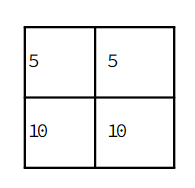

And a table of observed values that looked like this:

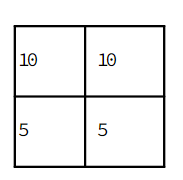

We could find the chi-squared value and the p-value using the scipy.stats.chisquare function like this:

In [11]:
import numpy as np
from scipy.stats import chisquare

observed = np.array([10, 10, 5, 5])
expected = np.array([5, 5, 10, 10])
chisquare_value, pvalue = chisquare(observed, expected)

chisquare_value, pvalue

(15.0, 0.0018166489665723214)

Use the scipy.stats.chisquare function to find the chi-squared value and p-value for the above observed and expected counts.

In [12]:
observed = np.array([6662, 1179, 15128, 9592])
expected = np.array([males_over50k, females_over50k, males_under50k, females_under50k])

chisquare_value, pvalue_gender_income = chisquare(observed, expected)

chisquare_value, pvalue_gender_income

(1520.0277713391151, 0.0)

### Cross Tables

We can also scale up the chi-squared test to cases where each category contains more than two possibilities. We'll show this with an example where we look at `sex` vs `race`.

Before we can find the chi-squared value, we need to find the observed frequency counts. We can do this using the pandas.crosstab function. The crosstab function will print a table that shows frequency counts for two or more columns. Here's how you could use the pandas.crosstab function:

In [14]:
import pandas as pd

income = pd.read_csv('income.csv')
table = pd.crosstab(income["sex"], [income["high_income"]])
print(table)

high_income   <=50K   >50K
sex                       
 Female        9592   1179
 Male         15128   6662


The above code will print a table showing how many people from income fall into each category of sex and high_income.

The second parameter passed into pandas.crosstab is actually a list -- this parameter can contain more than one item.

In [19]:
table = pd.crosstab(income["sex"], [income['race']])
table

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


### Finding expected values

Now that we have the observed frequency counts, we can generate the expected values. We can use the `scipy.stats.chi2_contingency` function to do this. The function takes in a cross table of observed counts, and returns the chi-squared value, the p-value, the degrees of freedom, and the expected frequencies. Let's use the following observed counts as an example:

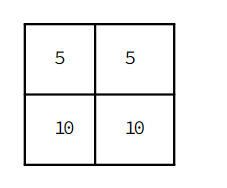

Here's how we could use the `scipy.stats.chi2_contingency` function:

In [18]:
from scipy.stats import chi2_contingency

observed = np.array([[5, 5], [10, 10]])

chisq_value, pvalue, df, expected = chi2_contingency(observed)

chisq_value, pvalue, df, expected

(0.0,
 1.0,
 1,
 array([[ 5.,  5.],
        [10., 10.]]))

You can also directly pass the result of the pandas.crosstab function into the scipy.stats.chi2_contingency function, which makes it easier to perform a chi-squared test.

**Use the scipy.stats.chi2_contingency function to calculate the p-value for the sex and race columns of income.**
- **Assign the result to pvalue_gender_race.**

In [20]:
chisq_value, pvalue, df, expected = chi2_contingency(table)

chisq_value, pvalue, df, expected

(454.2671089131088,
 5.192061302760456e-97,
 4,
 array([[  102.87709223,   343.69549461,  1033.40204539,    89.64531188,
          9201.3800559 ],
        [  208.12290777,   695.30450539,  2090.59795461,   181.35468812,
         18614.6199441 ]]))

### Caveats

Now that we've learned the chi-squared test, you should be able to figure out if the association between two columns of categorical data is statistically significant or not. There are a few caveats to using the chi-squared test that are important to cover, though:

- Finding that a result isn't significant doesn't mean that no association between the columns exists. For instance, if we found that the chi-squared test between the sex and race columns returned a p-value of .1, it wouldn't mean that there is no relationship between sex and race. It just means that there isn't a statistically significant relationship.

- Finding a statistically significant result doesn't imply anything about what the correlation is. For instance, finding that a chi-squared test between sex and race results in a p-value of .01 doesn't mean that the dataset contains too many Females who are White (or too few). A statistically significant finding means that some evidence of a relationship between the variables exists but needs to be investigated further.

- Chi-squared tests can only be applied in the case where each possibility within a category is independent. For instance, the Census counts individuals as either Male or Female, not both.

- Chi-squared tests are more valid when the numbers in each cell of the cross table are larger. So if each number is 100, great -- if each number is 1, you may need to gather more data.